In [46]:
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pathlib
import numpy as np
path = pathlib.Path.cwd()
path

PosixPath('/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/analysis')

/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/data/jet_images/0p0/RUN157.h5


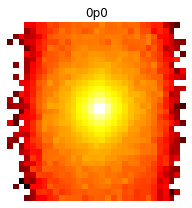

/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/data/jet_images/0p3/RUN157.h5


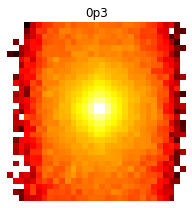

/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/data/jet_images/1p0/RUN157.h5


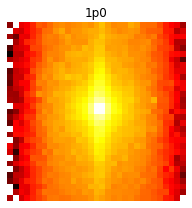

/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/data/jet_images/bkg_qcd/run_01_8.h5


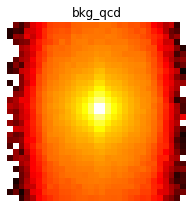

In [74]:
def plt_jet_img(jet_img_file):
    fig = plt.figure(figsize=(3,3))
    jet_img = h5py.File(jet_img_file, "r")["features"][:]
    jet0 = np.zeros((jet_img.shape[-1],jet_img.shape[-1]))
    for ix in range(jet_img.shape[0]):
        jeti = jet_img[ix]
        # jeti /= np.sum(jeti)
        jet0 += jeti
    jet0 /= np.sum(jet0)
    img = plt.imshow(jet0, norm=LogNorm(), interpolation="nearest", origin="lower")
    img.set_cmap('hot')
    #plt.colorbar(img)
    plt.axis('off')
    plt.title(jet_type)
    plt.tight_layout()
    plt.savefig(path.parent / "figures" / "jet_images" / f"{jet_type}.pdf")
    plt.savefig(path.parent / "figures" / "jet_images" / f"{jet_type}.png")
    plt.show()
    
    
jet_types = ["0p0", "0p3", "1p0", "bkg_qcd"]
for jet_type in jet_types:
    jet_img_path = path.parent / "data" / "jet_images" / jet_type
    for jet_img_file in pathlib.Path(jet_img_path).rglob("*.h5"):
        print(jet_img_file)
        plt_jet_img(jet_img_file)
        break